<a href="https://colab.research.google.com/github/somustafa/asoiu-skillcamp/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Handling missing values (Lala)

In [483]:
import pandas as pd

In [484]:
df=pd.read_csv("WineQuality.csv")

In [485]:
from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [486]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1359, 11)
X_test shape: (340, 11)
y_train shape: (1359,)
y_test shape: (340,)


In [487]:
df.duplicated().sum()

np.int64(240)

In [488]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [489]:
df=df.drop_duplicates()
df.shape

(1459, 12)

In [490]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,8.322581,0.528159,0.272738,2.536439,0.088169,16.093888,47.302253,0.996712,3.310052,0.657568,10.430073,5.626463
std,1.720042,0.182356,0.194563,1.344330,0.049037,10.483027,33.182546,0.001870,0.154904,0.170222,1.081437,0.824518
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.069000,7.921819,22.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.917558,0.520000,0.260000,2.200000,0.079000,14.000000,39.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.092000,22.000000,64.000000,0.997855,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [491]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [492]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Outlier detection and treatment (Sona)

In [493]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [494]:

# Q1, Q3 train üzərində hesablanır
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Train üçün mask
mask_train = ~((X_train < lower) | (X_train > upper)).any(axis=1)

X_train = X_train[mask_train]
y_train = y_train[mask_train]

print("Train shape after outlier removal:", X_train.shape)


# Test üçün eyni sərhədlər
mask_test = ~((X_test < lower) | (X_test > upper)).any(axis=1)

X_test = X_test[mask_test]
y_test = y_test[mask_test]

print("Test shape after outlier removal:", X_test.shape)

Train shape after outlier removal: (994, 11)
Test shape after outlier removal: (254, 11)


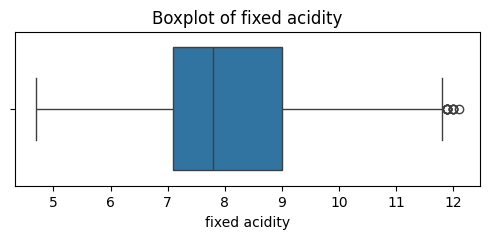

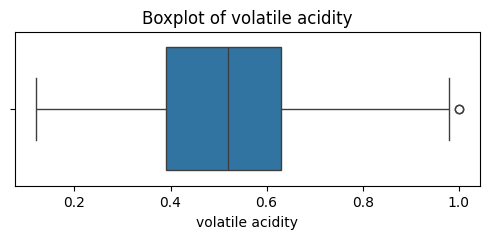

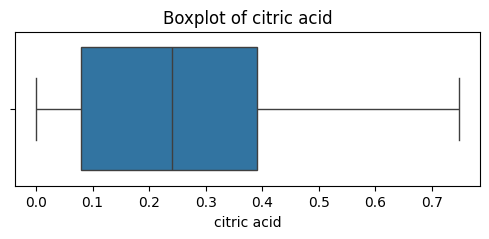

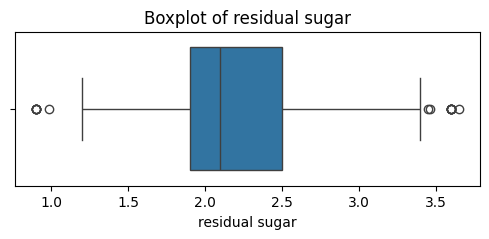

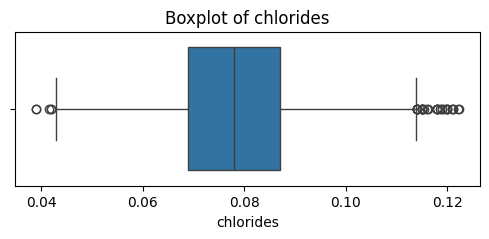

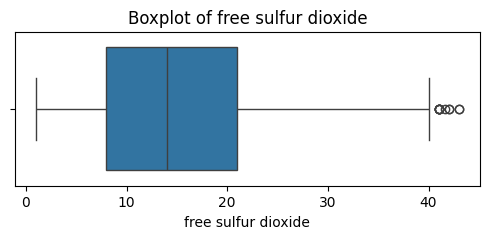

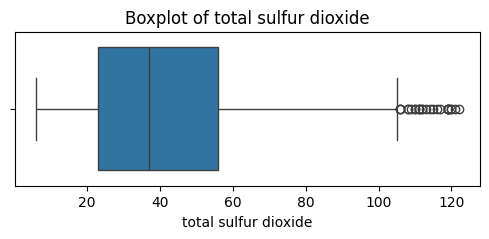

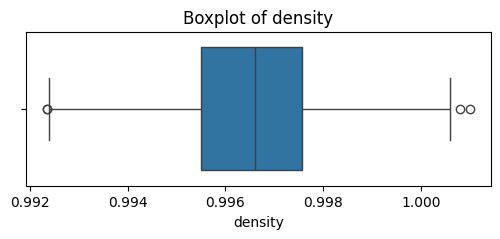

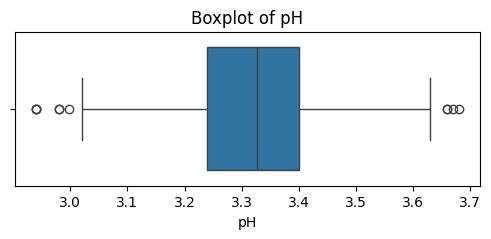

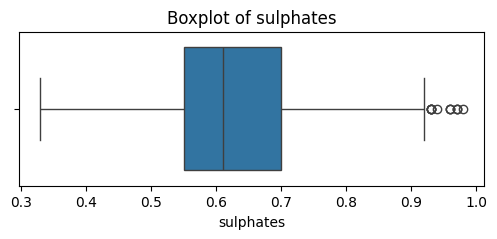

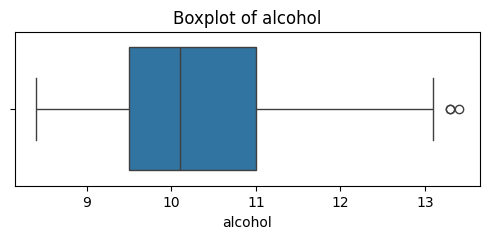

In [495]:
# Boxplot
def plot_boxplots(df):
    for col in df.columns:
        plt.figure(figsize=(6,2))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
plot_boxplots(X_train)

In [496]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [497]:
def remove_outliers_iqr(X, y):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = ~((X < lower) | (X > upper)).any(axis=1)

    X_clean = X.loc[mask].reset_index(drop=True)
    y_clean = y.loc[mask].reset_index(drop=True)

    return X_clean, y_clean


In [498]:
X_train, y_train = remove_outliers_iqr(X_train, y_train)
X_test, y_test = remove_outliers_iqr(X_test, y_test)


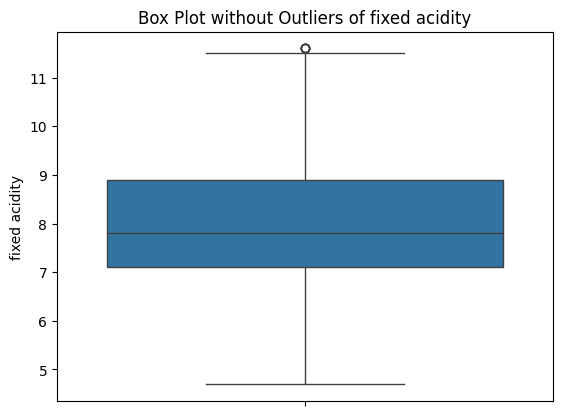

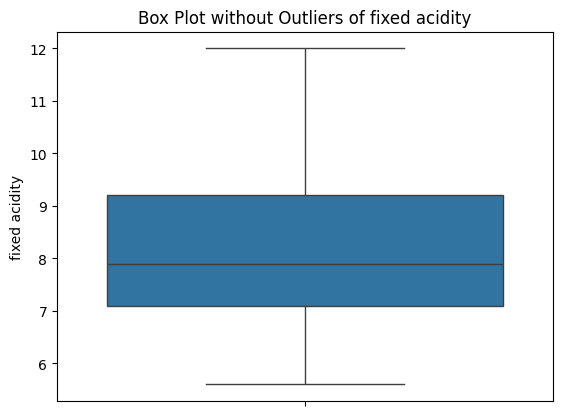

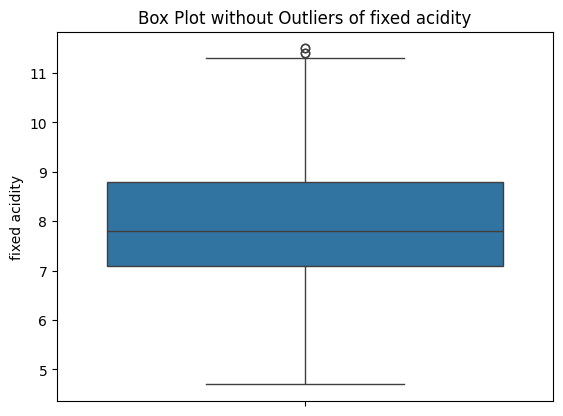

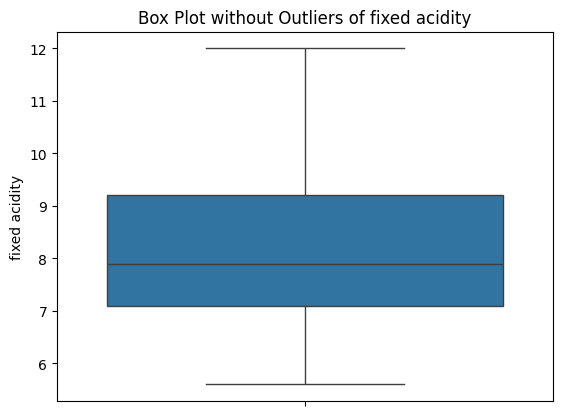

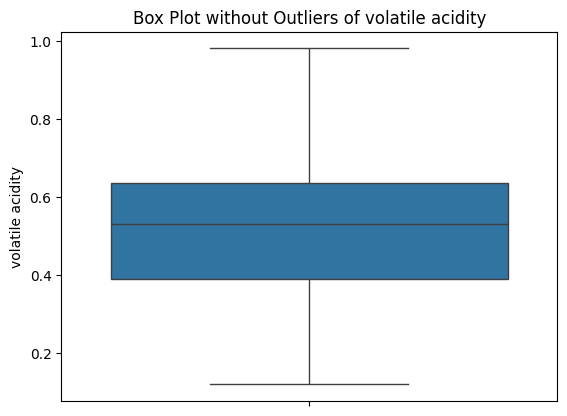

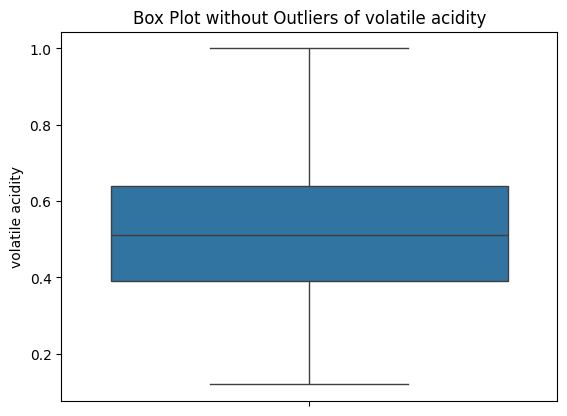

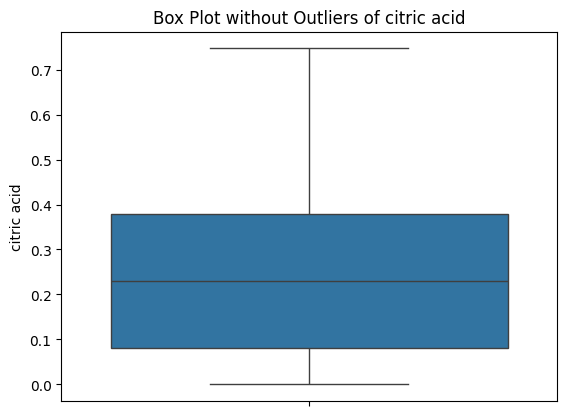

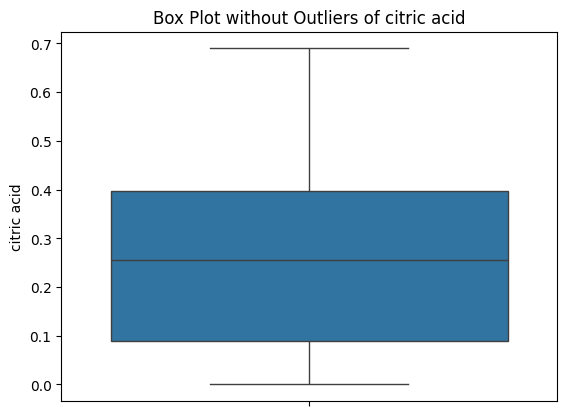

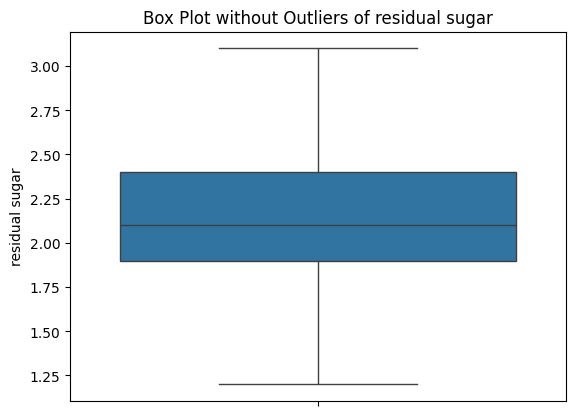

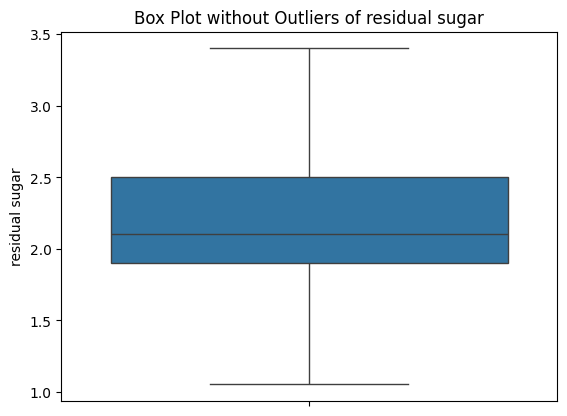

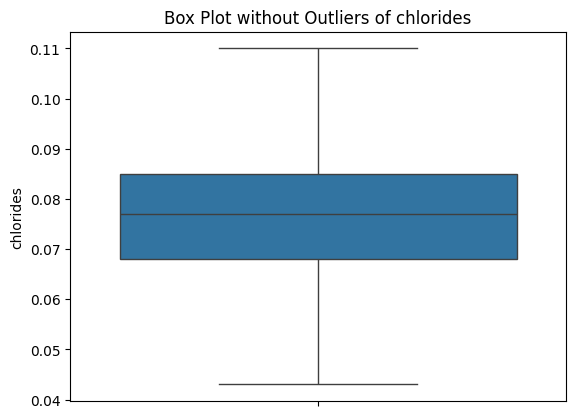

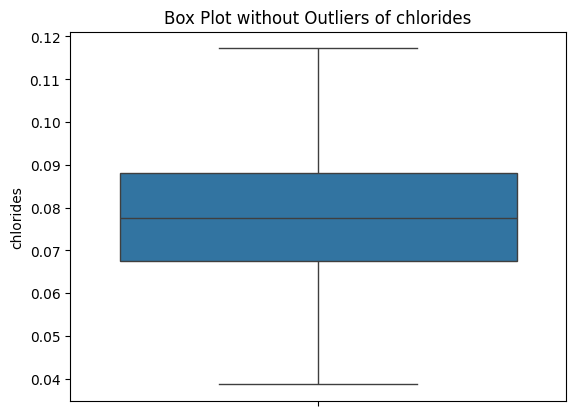

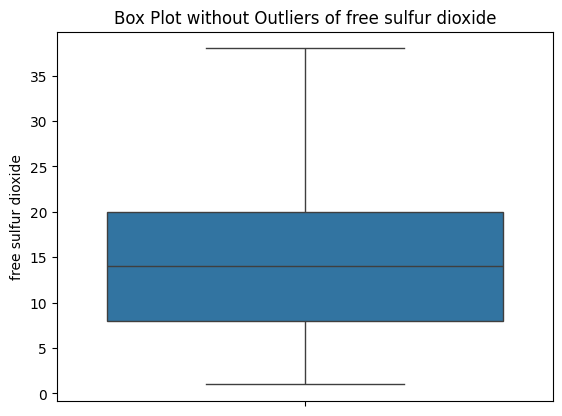

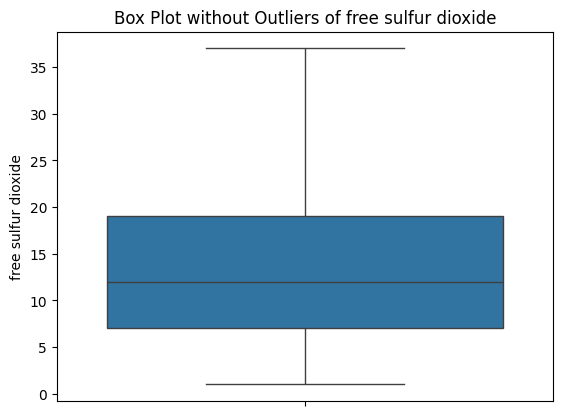

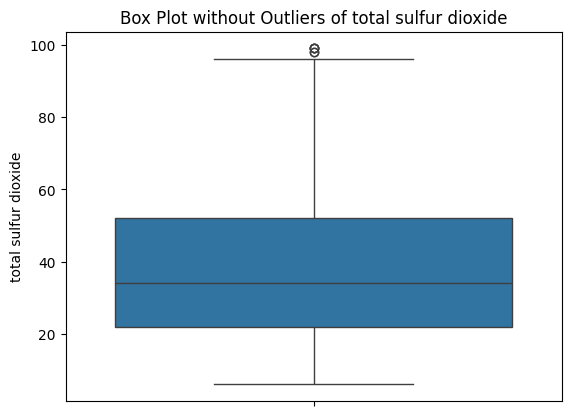

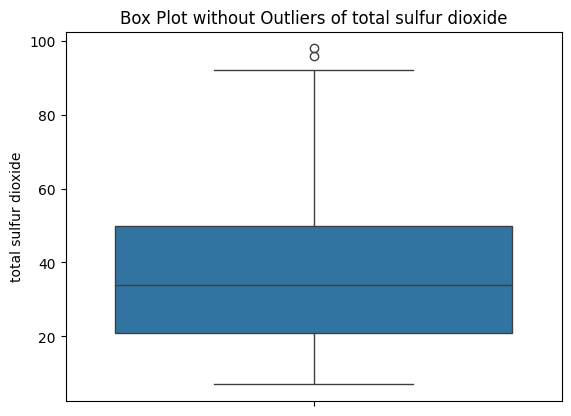

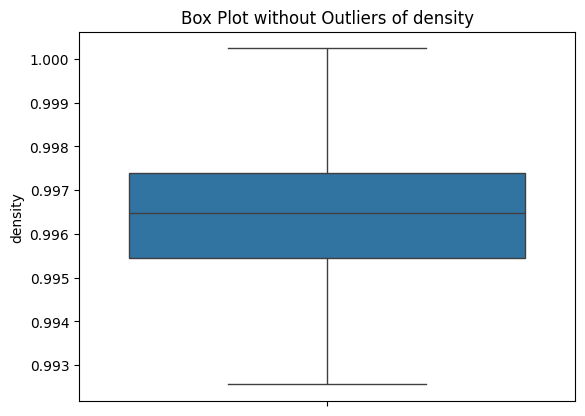

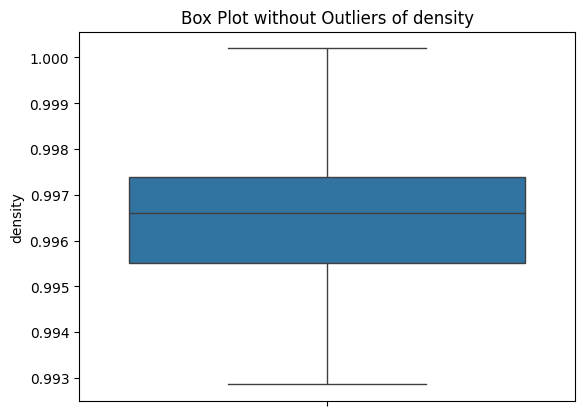

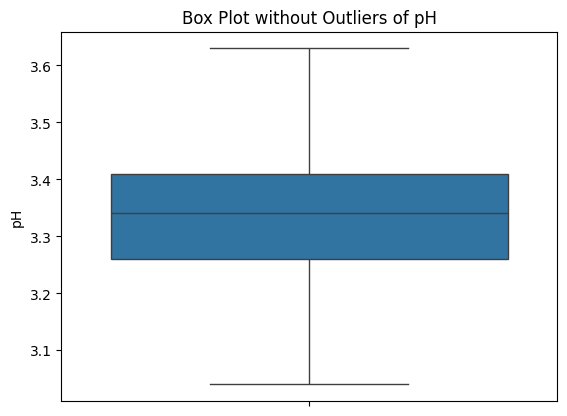

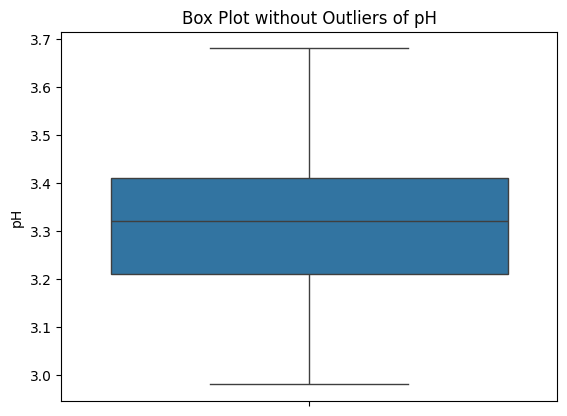

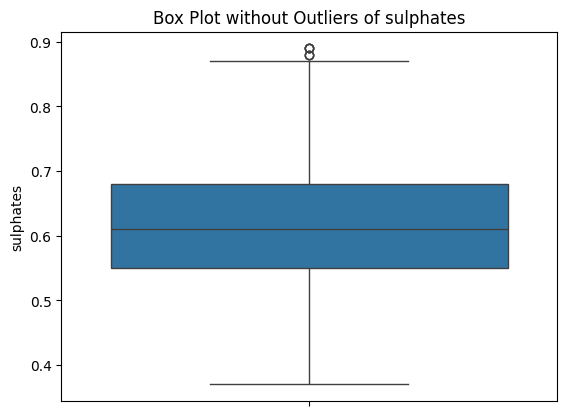

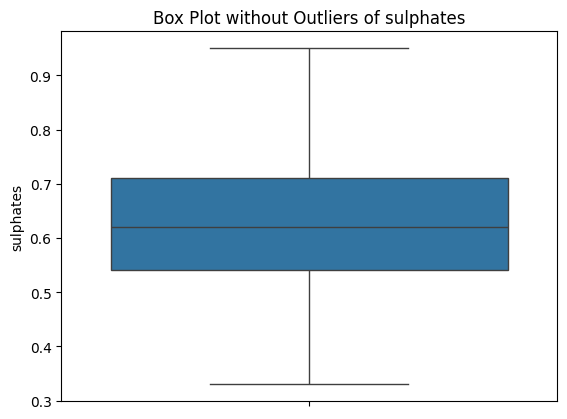

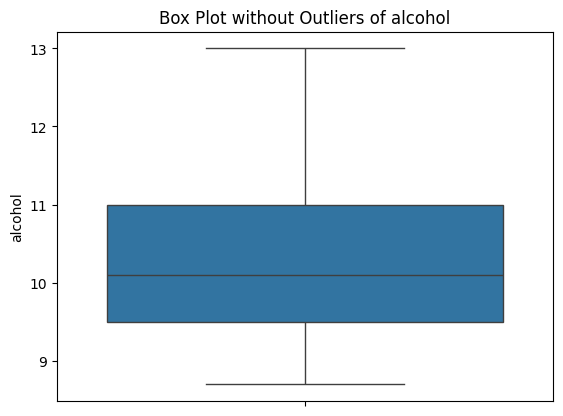

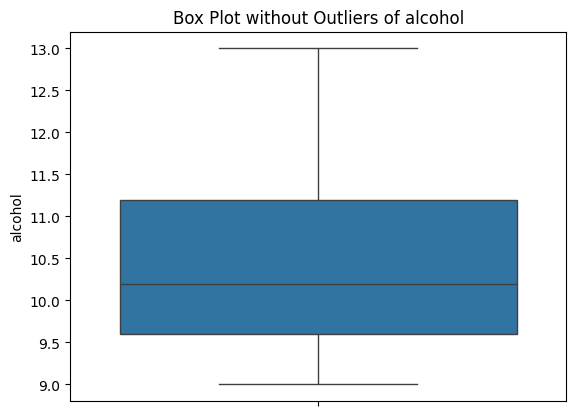

In [499]:
# fixed acidity ucun train və test
X_train = removal_box_plot(X_train, 'fixed acidity')
X_test = removal_box_plot(X_test, 'fixed acidity')

# butun sutunlar ucun
for col in X_train.columns:
    X_train = removal_box_plot(X_train, col)
    X_test = removal_box_plot(X_test, col)

In [500]:
print("After outlier removal:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

After outlier removal:
X_train: (792, 11)
X_test : (223, 11)


# FeatureScaling (normalization,standardization) (Abalfaz)

In [501]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [502]:
minmax_scaler = MinMaxScaler()

X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

print("Normalized X_train shape:", X_train_norm.shape)
print("Normalized X_test shape:", X_test_norm.shape)

Normalized X_train shape: (792, 11)
Normalized X_test shape: (223, 11)


In [503]:
pd.DataFrame(X_train_norm, columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.338741,0.360465,0.401386,0.421053,0.626866,0.135135,0.354839,0.117149,0.491525,0.173077,0.744186
1,0.616098,0.213717,0.603386,0.567425,0.296484,0.698587,0.186002,0.198950,0.052188,0.751676,0.083365
2,0.221184,0.372093,0.521801,0.684211,0.507463,0.135135,0.086022,0.389194,0.796610,0.615385,0.534884
3,0.412214,0.534884,0.187313,0.526316,0.507463,0.702703,0.580645,0.486818,0.406780,0.423077,0.255814
4,0.470993,0.139535,0.535181,0.210526,0.194030,0.270270,0.204301,0.538884,0.474576,0.961538,0.000000


In [504]:
standard_scaler = StandardScaler()

X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

print("Standardized X_train shape:", X_train_std.shape)
print("Standardized X_test shape:", X_test_std.shape)

Standardized X_train shape: (792, 11)
Standardized X_test shape: (223, 11)


In [505]:
pd.DataFrame(X_train_std, columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.778045,-0.565697,0.409576,-0.341846,0.653144,-1.071788,-0.002289,-2.020434,-0.071938,-1.557348,1.618638
1,0.741556,-1.336964,1.297727,0.390815,-1.113367,1.487063,-0.713313,-1.592096,-2.228123,1.315376,-1.350736
2,-1.422126,-0.504584,0.939018,0.975383,0.014711,-1.071788,-1.134362,-0.595918,1.425359,0.638692,0.678145
3,-0.375495,0.350997,-0.531653,0.185046,0.014711,1.505754,0.948653,-0.084728,-0.487854,-0.316108,-0.575845
4,-0.053454,-1.726843,0.997844,-1.395629,-1.661177,-0.458087,-0.636250,0.187907,-0.155122,2.357333,-1.725335


# Categorial encoding(OHE) (Vusala)

In [506]:
df.head()
df.shape

(1459, 12)

In [507]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [508]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index([], dtype='object')

# Linear Regression and Train Data




In [509]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.W = None
        self.b = None
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # m = sətir sayı, n = sütun (feature) sayı
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0
        self.costs = []

        for i in range(self.num_iterations):
            # Proqnoz (y = sigmoid(Wx + b))
            z = np.dot(X, self.W) + self.b
            y_predicted = self.sigmoid(z)

            # Gradientlərin hesablanması
            dw = (1 / m) * np.dot(X.T, (y_predicted - y))
            db = (1 / m) * np.sum(y_predicted - y)

            # Parametrlərin yenilənməsi
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # Cost (Xəta) funksiyası
            cost = -1/m * np.sum(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
            self.costs.append(cost)

            if i % 200 == 0:
                print(f"İterasiya {i}: Xəta (Cost) = {cost:.4f}")

    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.W) + self.b
        y_predicted = self.sigmoid(z)
        return (y_predicted >= threshold).astype(int)

In [510]:
y_train_array = (y_train >= 6).astype(int).values
y_test_array = (y_test >= 6).astype(int).values

In [511]:
X_train_final = X_train_std.values if hasattr(X_train_std, 'values') else X_train_std
X_test_final = X_test_std.values if hasattr(X_test_std, 'values') else X_test_std

In [512]:
# 1. Əvvəlcə y_train-i X_train-in indekslərinə uyğunlaşdıraq
# Çünki X_train outlier təmizləmədən sonra 792 sətirə düşüb
y_train_cleaned = y_train.loc[X_train.index]
y_test_cleaned = y_test.loc[X_test.index]

# 2. İndi onları array formatına və binary (0/1) formata salaq
y_train_array = (y_train_cleaned >= 6).astype(int).values
y_test_array = (y_test_cleaned >= 6).astype(int).values

# 3. X dəyərlərini final formata salaq
X_train_final = X_train_std.values if hasattr(X_train_std, 'values') else X_train_std
X_test_final = X_test_std.values if hasattr(X_test_std, 'values') else X_test_std

# Sayları yoxlayaq (Hər ikisi eyni rəqəm olmalıdır)
print(f"X_train sətir sayı: {X_train_final.shape[0]}")
print(f"y_train sətir sayı: {y_train_array.shape[0]}")

X_train sətir sayı: 792
y_train sətir sayı: 792


In [513]:
model = LogisticRegressionCustom(learning_rate=0.1, num_iterations=1000)
model.fit(X_train_final, y_train_array)


İterasiya 0: Xəta (Cost) = 0.6931
İterasiya 200: Xəta (Cost) = 0.5169
İterasiya 400: Xəta (Cost) = 0.5142
İterasiya 600: Xəta (Cost) = 0.5133
İterasiya 800: Xəta (Cost) = 0.5130


In [514]:
y_pred = model.predict(X_test_final)

In [515]:
accuracy = np.mean(y_pred == y_test_array)
print(f"\nModelin Dəqiqliyi: {accuracy * 100:.2f}%")


Modelin Dəqiqliyi: 68.16%


In [516]:
y_pred = model.predict(X_test)

In [517]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Logistic Regression proqnozları (y_test_pred artıq yuxarıda hesablanıb)
log_acc = accuracy_score(y_test_array, y_test_pred)
log_prec = precision_score(y_test_array, y_test_pred)
log_rec = recall_score(y_test_array, y_test_pred)
log_f1 = f1_score(y_test_array, y_test_pred)

print("--- LOGISTIC REGRESSION RESULTS ---")
print(f"Accuracy:  {log_acc:.4f}")
print(f"Precision: {log_prec:.4f}")
print(f"Recall:    {log_rec:.4f}")
print(f"F1 Score:  {log_f1:.4f}")

# Detallı hesabat
print("\nClassification Report:")
print(classification_report(y_test_array, y_test_pred))

--- LOGISTIC REGRESSION RESULTS ---
Accuracy:  0.5650
Precision: 0.5650
Recall:    1.0000
F1 Score:  0.7221

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.57      1.00      0.72       126

    accuracy                           0.57       223
   macro avg       0.28      0.50      0.36       223
weighted avg       0.32      0.57      0.41       223



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Logistic Regression and Train Model

In [518]:
df['quality_binary'] = (df['quality'] >= 6).astype(int)


In [519]:
# Features və target
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

In [520]:
y_train_clean = y_train.loc[X_train.index]
y_test_clean = y_test.loc[X_test.index]


In [521]:
X_train_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_b = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]

y_train_array = (y_train_clean >= 6).astype(int).values
y_test_array = (y_test_clean >= 6).astype(int).values

In [522]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, beta):
    m = len(y)
    h = sigmoid(X @ beta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)

    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


def gradient_descent(X, y, beta, learning_rate, num_iterations):
    """Gradient descent optimization"""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X @ beta)

        gradient = 1/m * X.T @ (h - y)

        beta = beta - learning_rate * gradient

        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return beta, cost_history


def predict(X, beta, threshold=0.5):
    probabilities = sigmoid(X @ beta)
    predictions = (probabilities >= threshold).astype(int)
    return predictions, probabilities


In [523]:
# Parametrləri initialize edirik
np.random.seed(42)
beta_initial = np.random.randn(X_train_b.shape[1]) * 0.01

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Training
beta_optimal, cost_history = gradient_descent(
    X_train_b,
    y_train_clean.values,
    beta_initial,
    learning_rate,
    num_iterations
)
y_test_pred, y_test_prob = predict(X_test_b, beta_optimal)


print("TRAINING is done!")

print(f"Intercept (beta_0): {beta_optimal[0]:.4f}")
print(f"Coefficients (beta_1 ... beta_n):")
for i, col in enumerate(X_train.columns):
    print(f"  {col}: {beta_optimal[i+1]:.4f}")

Iteration 0: Cost = -1.9743
Iteration 100: Cost = -159.6290
Iteration 200: Cost = -160.1008
Iteration 300: Cost = -160.1008
Iteration 400: Cost = -160.1008
Iteration 500: Cost = -160.1008
Iteration 600: Cost = -160.1008
Iteration 700: Cost = -160.1008
Iteration 800: Cost = -160.1008
Iteration 900: Cost = -160.1008
TRAINING is done!
Intercept (beta_0): 463.7038
Coefficients (beta_1 ... beta_n):
  fixed acidity: 7.0129
  volatile acidity: -27.0778
  citric acid: 16.3445
  residual sugar: 2.2288
  chlorides: -11.4387
  free sulfur dioxide: 0.1273
  total sulfur dioxide: -12.1815
  density: -18.9515
  pH: -6.0767
  sulphates: 33.3728
  alcohol: 37.3115


In [524]:
y_test_pred, y_test_prob = predict(X_test_b, beta_optimal)

--- LOGISTIC REGRESSION EVALUATION ---
Accuracy (Dəqiqlik): 0.5650
Precision:           0.5650
Recall (Həssaslıq):  1.0000
F1-Score:            0.7221

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.57      1.00      0.72       126

    accuracy                           0.57       223
   macro avg       0.28      0.50      0.36       223
weighted avg       0.32      0.57      0.41       223



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


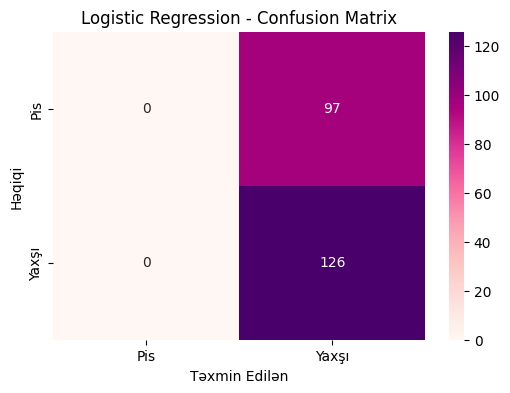

In [525]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Metrikaların hesablanması
accuracy = accuracy_score(y_test_array, y_test_pred)
precision = precision_score(y_test_array, y_test_pred)
recall = recall_score(y_test_array, y_test_pred)
f1 = f1_score(y_test_array, y_test_pred)

print("--- LOGISTIC REGRESSION EVALUATION ---")
print(f"Accuracy (Dəqiqlik): {accuracy:.4f}")
print(f"Precision:           {precision:.4f}")
print(f"Recall (Həssaslıq):  {recall:.4f}")
print(f"F1-Score:            {f1:.4f}")

# 2. Detallı Classification Report
print("\nClassification Report:")
print(classification_report(y_test_array, y_test_pred))

# 3. Confusion Matrix Vizuallaşdırma
cm = confusion_matrix(y_test_array, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Pis', 'Yaxşı'], yticklabels=['Pis', 'Yaxşı'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Təxmin Edilən')
plt.ylabel('Həqiqi')
plt.show()